# Predicción de precios de propiedades utilizando redes neuronales.

Se busca predecir el valor de un propiedad dadas sus distintas características.

Para eso se utiliza los datos de las propiedades en King County, USA.

En primer lugar se realiza un análisis exploratorio de la información, para familiarizarse con la información brindada, luego se prepara ésta para poder implementar el modelo con redes neuronales. Finalmente se evalúa el mismo.

In [3]:
# Importando librerias necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Parte 1: Análisis exploratorio de datos 

In [10]:
# Cargando el dataset con la información de las propiedades y creando el dataframe:

df = pd.read_csv("kc_house_data.csv") # Se va a predecir el precio de una propiedad/casa.

In [11]:
# Dandole una mirada rápida al dataframe:
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
# Revisando que no haya valores faltantes/nulos:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# Otra info relevante:

df.describe() #para transponerla: df.describe().transpose() [cambia columnas por filas]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


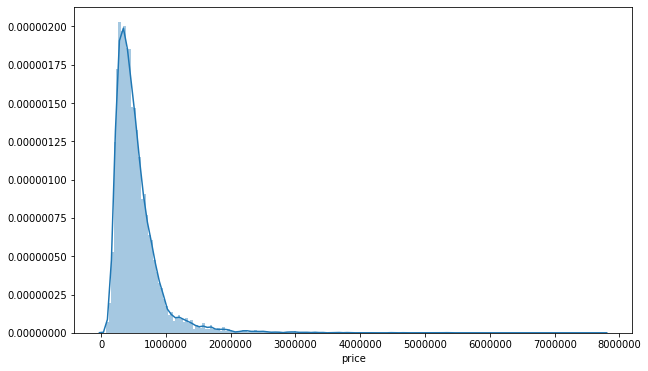

In [14]:
# Analizando la distribución de la varaible que buscamos predecir (precio):
plt.figure(figsize=(10,6))
sns.distplot(df["price"], bins=200)

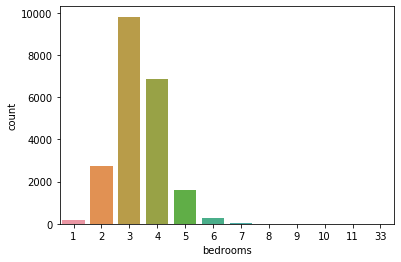

In [15]:
# Graficando la cantidad de casas según la cantidad de habitaciones que posea:

sns.countplot(df["bedrooms"])

In [16]:
# Comparando la correlacion de una feature/característica con nuestra label(precio):

df.corr()["price"].sort_values()

# Puede verse que las que tienen mayor correlacion es "sqft_living".

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

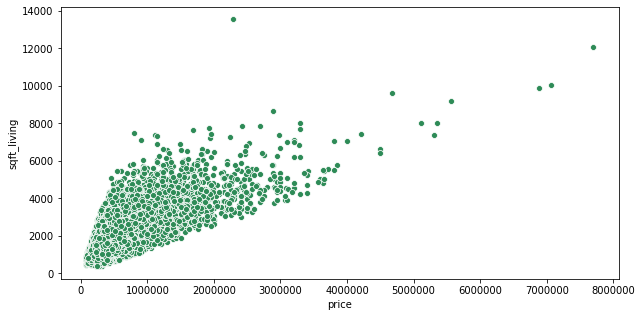

In [17]:
# Graficando esa correlación:
plt.figure(figsize=(10,5))
sns.scatterplot(x="price", y="sqft_living", data=df, color="seagreen")

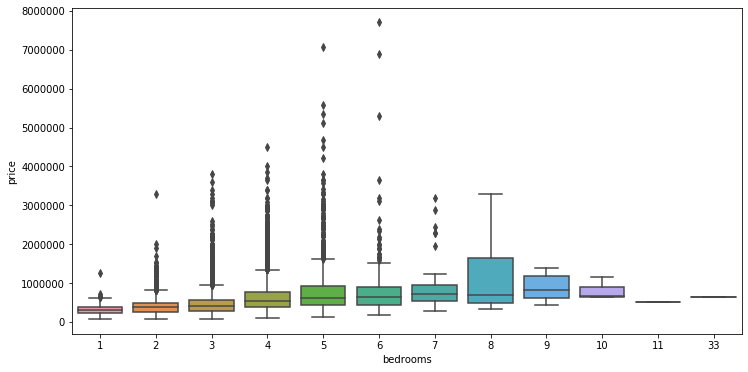

In [18]:
# Graficando la distribucion de precio, segun cada categoria de cantidad de habitaciones:

plt.figure(figsize=(12,6))
sns.boxplot(x="bedrooms", y="price", data=df)

In [20]:
# COSAS EXTRA QUE HICE YO PARA PRACTICAR:

In [21]:
def binary_counter(array):
    """
    Funcion que se fija si tiene sotano o no la casa y devuelve una lista con 1 y 0 
    para poderlo usar con hue split=true
    """
    contador=[]
    for i in array:
        if i>0:
            contador.append(1)
        else:
            contador.append(0)
    return contador

In [22]:
#probando que funcione la funcion anterior:
array_ej = [23, 1515, 0, 5189, 0] 
binary_counter(array_ej)

[1, 1, 0, 1, 0]

In [23]:
array_ej2 = df["sqft_basement"] #aplicando la funcion a la variable sqft_basement de la dataframe
binario_sqft_basement = binary_counter(array_ej2) # Nuevo array con los los valores binarios.
#print(binario_sqft_basement)

In [24]:
df["binario_sqft_basement"] = binario_sqft_basement # Añadiendolo a nuestro dataframe.

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


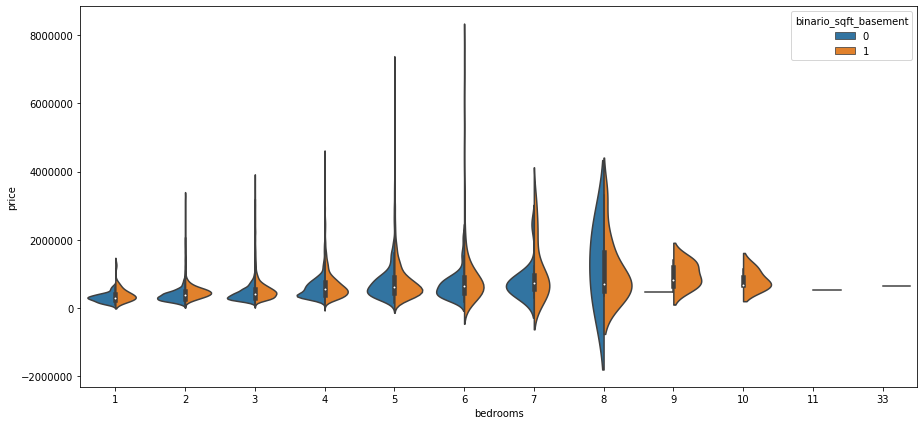

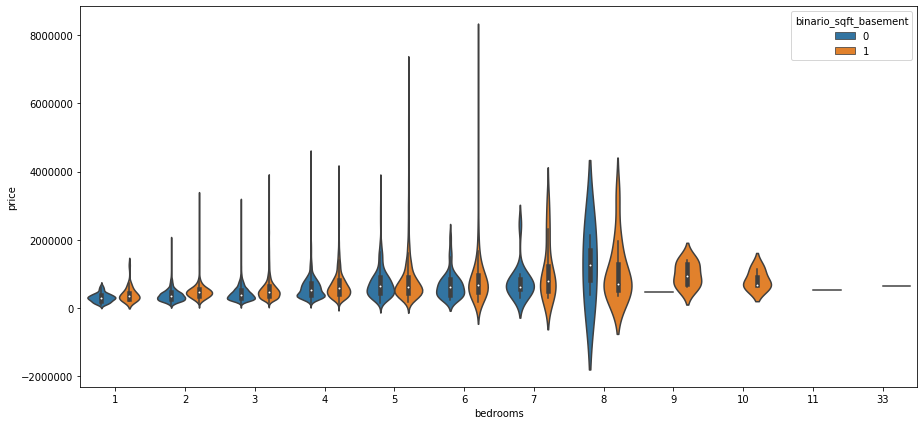

In [26]:
# Graficando la distribución de los precios segun tenga sótano o no:
plt.figure(figsize=(15,7))
sns.violinplot(x="bedrooms", y="price", data=df, hue="binario_sqft_basement", split=True)

plt.figure(figsize=(15,7))
sns.violinplot(x="bedrooms", y="price", data=df, hue="binario_sqft_basement")

Puede notarse que la distribuciones de precios son muy parecidas para propiedades con sótano y sin sótano para propiedades con 5 habitaciones o menos. A partir de las 6 habitaciones puede notarse una importante diferencia entre las 2 distribuciones: Sin sótano (azul) y Con sótano (naranja).

In [30]:
#Realizando un análisis geográfico:

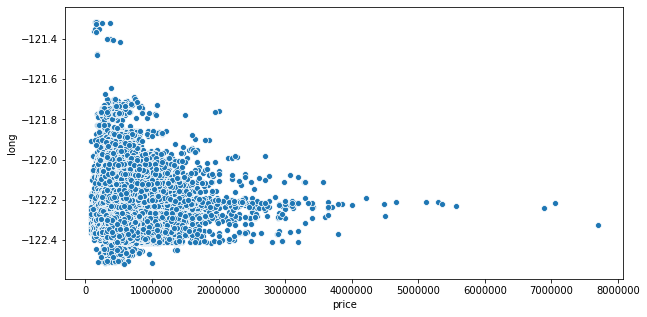

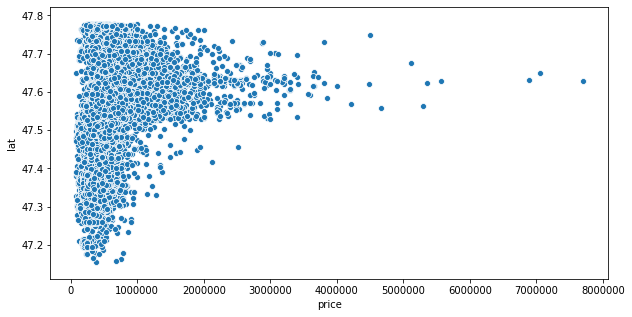

In [31]:
# Analizando la correlacion entre latitud/longitud y precios:
plt.figure(figsize=(10,5))
sns.scatterplot(x="price", y="long", data=df)

plt.figure(figsize=(10,5))
sns.scatterplot(x="price", y="lat", data=df)

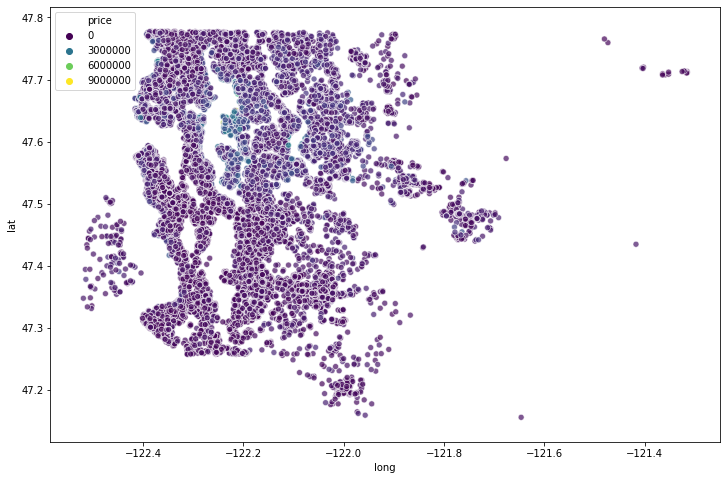

In [32]:
# Graficando las latitudes y longitudes, en funcion del precio:

plt.figure(figsize=(12,8))
sns.scatterplot(x="long", y="lat", data=df, hue="price", palette="viridis", alpha=0.7)

In [33]:
# Identificando valores extremos para eliminarlos y mejorar nuestro futuro modelo:

df.sort_values("price", ascending=False).head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,1
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,1
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,1
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,1
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,1
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,1
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,1
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,1
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,0


In [34]:
# Para eliminar los valores extremos (los de precios muy alto, que son muy pocas casas)

print(len(df)*0.01) # <--- para saber cuantas filas eliminar, vamos a quitar el top 1% mas caro
non_top_1_perc = df.sort_values("price", ascending=False).iloc[216:] # <--- selecciona a partir de la fila 216 (top 1%)

215.97


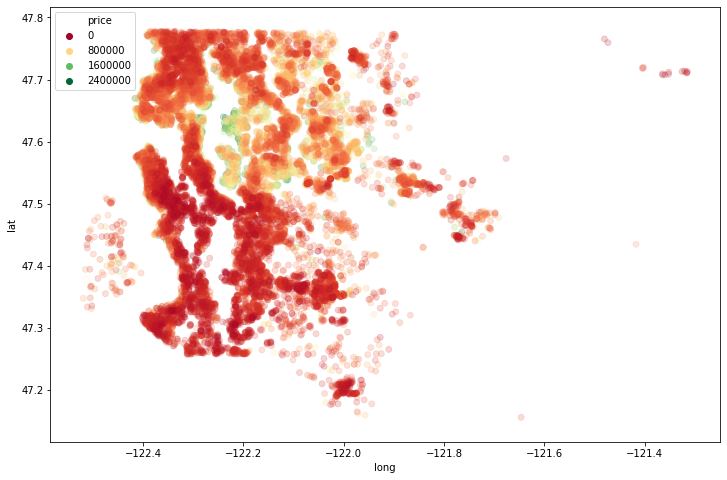

In [35]:
# Graficando de nuevo sin esos valores extremos:

plt.figure(figsize=(12,8))
sns.scatterplot(x="long", y="lat", data=non_top_1_perc, hue="price", 
                palette="RdYlGn", alpha=0.2, edgecolor=None)

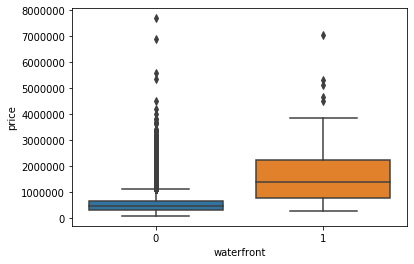

In [36]:
# grafico de distribucion de si las propiedades estan en cercanias al agua(waterfront) o no:
sns.boxplot(x="waterfront", y="price", data=df)

## SEGUNDA PARTE:  FEATURE ENGINEERING

En esta sección vamos a analizar cuales datos dentro del dataset nos son relevantes y cuales necesitan ser acomodados o directamente removidos del mismo.

In [37]:
# Limpiando datos que no son relevantes:

# Quitando la columna "id" que no nos sirve para nada:
df = df.drop("id", axis=1)

# Cambiando el formato de las fechas (a datetime object, de pandas):
df["date"] = pd.to_datetime(df["date"])

In [38]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [39]:
# Añadiendo otra columna con año y meses:

df["year"] = df["date"].apply(lambda date: date.year)
df["month"] = df["date"].apply(lambda date: date.month)

In [40]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,1,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,2


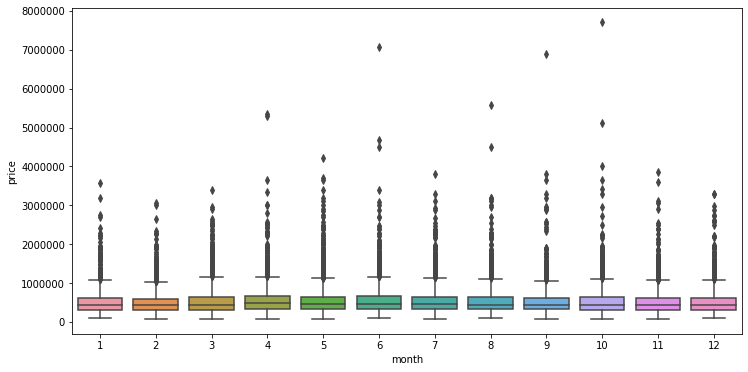

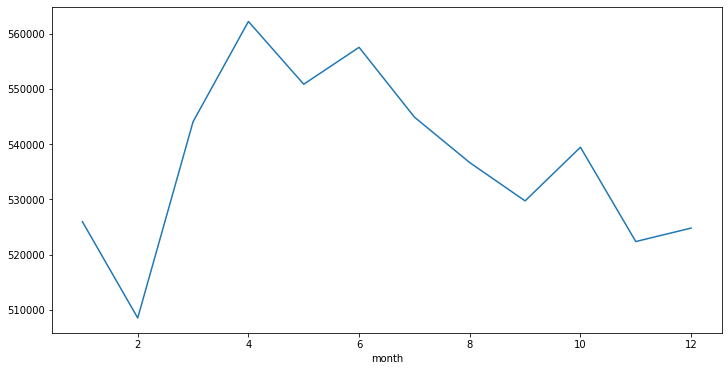

In [41]:
# Analizando teniendo en cuenta las fechas:

plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="price", data=df)

# Como es dificil en este caso ver diferencia, vemos los numeros:

plt.figure(figsize=(12,6))
df.groupby("month").mean()["price"].plot()

Puede verse mas facilmente que la diferencia de precios no es tanta, 50.000 usd.

In [42]:
# Dejamos "month" y "year" para usarlos posteriormente en el modelo, pero eliminamos "date" ya que ahora no cumple ninguna función.
df = df.drop("date", axis=1)

In [43]:
# vamos a ver si es necesario incluir zipcode:
df["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [44]:
# como hay 70 categorias, se complica bastante para separarlos en categorias, lo dropeamos/eliminamos:
df = df.drop("zipcode", axis=1)

In [45]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,1,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,0,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,1,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,0,2015,2


In [46]:
# vamos a ver si es necesario incluir "yr_renovated" (años de renovación):
df["yr_renovated"].value_counts() 

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Vemos que 0 significa NO RENOVADA
Las que dicen fechas, es la fecha en que fue renovada

Como en este caso las casas renovadas en años mas recientes tienen mayor valor, y las q no fueron renovadas figuran como "año 0" podemos dejarlo asi para el algoritmo.

El algoritmo pensará: mientras mayor (yr_renovated) -> mayor precio/valor.

Lo mismo sucede con "sqft_basement".

Acá concluye la parte de features engineering.

## TERCERA PARTE :  DATA PRE-PROCESSING

En esta parte se va a prepar la data, separando en:

* Features(X): Son nuestras "variables independientes", las que vamos a usar para estimar la variable dependiente.
* Labels(Y): Son las variables dependientes a estimar o predecir. En éste caso solamente es una, el precio de la propiedad.

A su vez también es necesario dividir la data disponible en:

* Train : La parte de la data que se usa para entrenar el modelo.
* Test: La parte de la data que se usa para comparar posteriormente los resultados obtenidos con la predicción, con los resultados reales.

Finalmente se debe realizar una estandarización / scaling de los datos, para que puedan ser utilizados en el modelo.

In [47]:
# Separando nuestras features(X) de nuestros labels(y):

X = df.drop("price", axis=1).values
y = df["price"].values               #values es para asegurar q no haya problemas de tipo de datos de numpy o pandas

In [48]:
# Separando la data en train y test:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
# Realizando el scaling / estandarización:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #creando instancia

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## CUARTA  PARTE :  CREANDO EL MODELO

En esta sección se realiza la creación del modelo predictivo de redes neuronales en sí.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
print(X_train.shape) # como tenemos 20 features, usamos 20 neuronas

# Creando el Sequential / modelo

model = Sequential()

model.add(Dense(20, activation="relu")) #creando las distintas capas
model.add(Dense(20, activation="relu")) 
model.add(Dense(20, activation="relu")) 
model.add(Dense(20, activation="relu")) 

model.add(Dense(1)) # capa final que nos da el output

model.compile(optimizer="adam", loss="mse")


(15117, 20)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## QUINTA  PARTE :  ENTRENANDO EL MODELO

In [55]:
# Entrenando el modelo:

model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400) 

# Se agrega tambien la data de validacion, esta no afecta al entrenamiento de la red sino que va chequeando.
# Se procesará en batch porque es un dataset grande.

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 0s 26us/sample - loss: 430237939991.2173 - val_loss: 418897961425.2247
Epoch 2/400
15117/15117 [==============================] - 0s 8us/sample - loss: 428528913205.9366 - val_loss: 412640822502.0839
Epoch 3/400
15117/15117 [==============================] - 0s 8us/sample - loss: 401310655638.3113 - val_loss: 349487524482.2123
Epoch 4/400
15117/15117 [==============================] - 0s 8us/sample - loss: 277013089993.7585 - val_loss: 172082087344.3555
Epoch 5/400
15117/15117 [==============================] - 0s 8us/sample - loss: 122340168499.6335 - val_loss: 94585403983.6444
Epoch 6/400
15117/15117 [==============================] - 0s 9us/sample - loss: 96757109808.1619 - val_loss: 92692996864.6321
Epoch 7/400
15117/15117 [==============================] - 0s 9us/sample - loss: 94958512078.5510 - val_loss: 91119861163.2988
Epoch 8/400
15117/15117 [===========================

15117/15117 [==============================] - 0s 8us/sample - loss: 37648778645.5492 - val_loss: 36401120106.8247
Epoch 65/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37455620414.6410 - val_loss: 36363002407.1901
Epoch 66/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37378206811.0403 - val_loss: 36137684840.2963
Epoch 67/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37186551048.3149 - val_loss: 35953072193.7383
Epoch 68/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37065978685.5233 - val_loss: 35805601225.6395
Epoch 69/400
15117/15117 [==============================] - 0s 8us/sample - loss: 36944565566.1668 - val_loss: 35664733287.6642
Epoch 70/400
15117/15117 [==============================] - 0s 8us/sample - loss: 36768703001.7744 - val_loss: 35548407054.5383
Epoch 71/400
15117/15117 [==============================] - 0s 8us/sample - loss: 36655583112.5096 - val_loss: 354134

Epoch 128/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32890020105.4326 - val_loss: 31381473244.6025
Epoch 129/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32835316942.2631 - val_loss: 31325872674.1333
Epoch 130/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32805124737.8882 - val_loss: 31300303561.0074
Epoch 131/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32752521885.7964 - val_loss: 31238137428.7012
Epoch 132/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32682917057.3929 - val_loss: 31442484671.5259
Epoch 133/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32733594630.2658 - val_loss: 31168418929.7778
Epoch 134/400
15117/15117 [==============================] - 0s 9us/sample - loss: 32644376215.4967 - val_loss: 31152523107.2395
Epoch 135/400
15117/15117 [==============================] - 0s 9us/sample - loss: 32697726804.08

15117/15117 [==============================] - 0s 8us/sample - loss: 31338761618.7381 - val_loss: 29579066704.2765
Epoch 192/400
15117/15117 [==============================] - 0s 8us/sample - loss: 31330179894.3431 - val_loss: 29502017359.0123
Epoch 193/400
15117/15117 [==============================] - 0s 8us/sample - loss: 31315018159.7640 - val_loss: 29510741803.6148
Epoch 194/400
15117/15117 [==============================] - 0s 8us/sample - loss: 31301579486.2155 - val_loss: 29455497342.4198
Epoch 195/400
15117/15117 [==============================] - 0s 9us/sample - loss: 31351834986.5354 - val_loss: 29428632173.9852
Epoch 196/400
15117/15117 [==============================] - 0s 10us/sample - loss: 31279444159.8349 - val_loss: 29467419812.3457
Epoch 197/400
15117/15117 [==============================] - 0s 10us/sample - loss: 31266288156.4162 - val_loss: 29424194906.3901
Epoch 198/400
15117/15117 [==============================] - 0s 10us/sample - loss: 31210866472.9986 - val_lo

15117/15117 [==============================] - 0s 8us/sample - loss: 30518936964.4792 - val_loss: 28637417229.2741
Epoch 255/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30550802998.0213 - val_loss: 28460741376.6321
Epoch 256/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30513220352.7621 - val_loss: 28433174194.2519
Epoch 257/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30427139658.1396 - val_loss: 28455563959.3086
Epoch 258/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30471738011.4255 - val_loss: 28564192592.2765
Epoch 259/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30491751496.5477 - val_loss: 28376124635.9704
Epoch 260/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30454926005.2338 - val_loss: 28432510460.2074
Epoch 261/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30440566510.7437 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 29832436292.5173 - val_loss: 27620121759.2889
Epoch 318/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29820712454.5367 - val_loss: 27593969446.5580
Epoch 319/400
15117/15117 [==============================] - 0s 9us/sample - loss: 29803908268.5295 - val_loss: 27634301656.1778
Epoch 320/400
15117/15117 [==============================] - 0s 9us/sample - loss: 29892661384.4927 - val_loss: 27574896761.3630
Epoch 321/400
15117/15117 [==============================] - 0s 9us/sample - loss: 29796077088.2773 - val_loss: 27554006089.3235
Epoch 322/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29815816919.6449 - val_loss: 27629397639.2691
Epoch 323/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29795127216.2043 - val_loss: 27542409028.8988
Epoch 324/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29777192782.2208 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 29310317010.6492 - val_loss: 26877302900.3062
Epoch 381/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29234509272.0683 - val_loss: 26868478882.4494
Epoch 382/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29245431099.2202 - val_loss: 26837266806.2025
Epoch 383/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29198800459.6298 - val_loss: 26808813765.2148
Epoch 384/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29182192173.4524 - val_loss: 26837683864.9679
Epoch 385/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29261328082.9710 - val_loss: 26802825054.1827
Epoch 386/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29172512885.1873 - val_loss: 26798406264.0988
Epoch 387/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29158995895.2491 - val_loss:

## SEXTA   PARTE : EVALUACION DEL MODELO Y PREDICCIÓN

           loss      val_loss
0  4.302379e+11  4.188980e+11
1  4.285289e+11  4.126408e+11
2  4.013107e+11  3.494875e+11
3  2.770131e+11  1.720821e+11
4  1.223402e+11  9.458540e+10


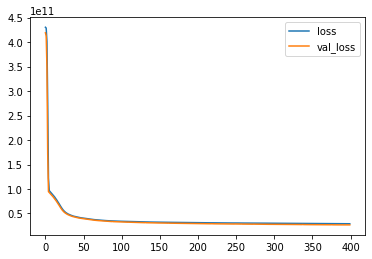

In [57]:
# Analizando la data sobre el progreso del error durante el entrenamiento:

losses = pd.DataFrame(model.history.history)
print(losses.head())
losses.plot() #graficando estos errores

Como el value loss todavia sigue descendiendo, indica que podemos seguir entrenando el modelo sin ocasionar over-fitting en nuestra data.

Cuando el value loss varia (aumenta, baja, etc) indica que estamos haciendo overfitting.

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [59]:
# Realizando predicción:

predictions = model.predict(X_test)

In [60]:
# Analizando error cuadratico medio:

np.sqrt(mean_squared_error(y_test, predictions))

163546.96531427742

In [61]:
# Analizando error absoluto medio:

mean_absolute_error(y_test, predictions)

101818.09083658854

In [62]:
# Para entender que nos representa estos valores de error, se deben comparar con el promedio del precio (mean):

df.describe() #se puede ver que el valor promedio de precio es:
print(	5.402966e+05)

540296.6


En nuestro caso, el error absoluto promedio es bastante malo, de 101818.09, representando alrededor de un 20%.

In [63]:
explained_variance_score(y_test, predictions)

0.7989489888465569

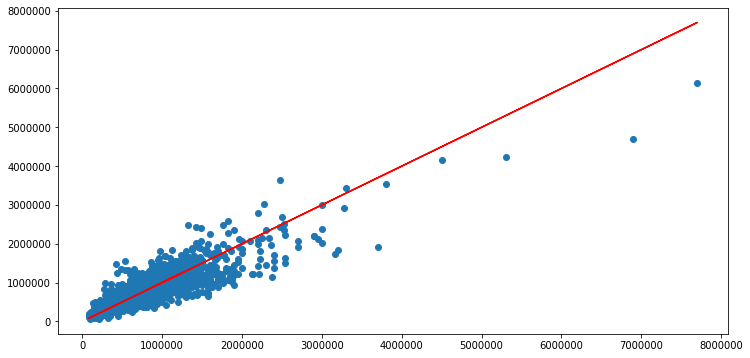

In [64]:
# Graficando diferencias entre lo predicho y lo real:

plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, "r") #para compararlo con la recta de correlacion perfecta

Puede verse que el modelo es bastante bueno para predecir valores <3000000, podria reentrenarse el modelo eliminando los datos por encima de este limite y la precisión del modelo subiría de forma importante

In [65]:
# Prediciendo un precio para una casa en particular de la cual nos dan los datos (sus features):

single_house = df.drop("price", axis=1).iloc[0]      #seleccionando datos para una sola casa
single_house_re = single_house.values.reshape(-1, 20) #acomodando la matriz y usando .values
single_house_re = scaler.transform(single_house_re)  #escalando

model.predict(single_house_re) #prediciendo

array([[288246.16]], dtype=float32)

### Volviendo a realizar el modelo, seleccionando solo propiedades con precio menor a 2000000:

In [89]:
df2 = df[df['price'] < 2000000] 

In [90]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,binario_sqft_basement,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,0,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,1,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,0,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,1,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,0,2015,2


In [91]:
# Separando nuestras features(X) de nuestros labels(y):

X = df2.drop("price", axis=1).values
y = df2["price"].values   

# Separando la data en train y test:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Realizando el scaling / estandarización:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #creando instancia

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
print(X_train.shape) # como tenemos 20 features, usamos 20 neuronas

# Creando el Sequential / modelo

model = Sequential()

model.add(Dense(20, activation="relu")) #creando las distintas capas
model.add(Dense(20, activation="relu")) 
model.add(Dense(20, activation="relu")) 
model.add(Dense(20, activation="relu")) 

model.add(Dense(1)) # capa final que nos da el output

model.compile(optimizer="adam", loss="mse")

(14972, 20)


In [93]:
# Entrenando el modelo:

model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_test, y_test),
          batch_size=128,
          epochs=400) 

Train on 14972 samples, validate on 6417 samples
Epoch 1/400
14972/14972 [==============================] - 0s 29us/sample - loss: 349626948763.1183 - val_loss: 354862442902.9191
Epoch 2/400
14972/14972 [==============================] - 0s 8us/sample - loss: 348310647225.0067 - val_loss: 350151381093.4904
Epoch 3/400
14972/14972 [==============================] - 0s 8us/sample - loss: 328736124397.2599 - val_loss: 304904321984.3292
Epoch 4/400
14972/14972 [==============================] - 0s 8us/sample - loss: 236248821111.0745 - val_loss: 161805504506.2552
Epoch 5/400
14972/14972 [==============================] - 0s 9us/sample - loss: 93690816105.4641 - val_loss: 60945271173.3657
Epoch 6/400
14972/14972 [==============================] - 0s 9us/sample - loss: 53934876575.1536 - val_loss: 56344975729.2591
Epoch 7/400
14972/14972 [==============================] - 0s 9us/sample - loss: 52633892901.7537 - val_loss: 55525513155.0419
Epoch 8/400
14972/14972 [============================

14972/14972 [==============================] - 0s 10us/sample - loss: 23654146834.2613 - val_loss: 24947511426.6928
Epoch 65/400
14972/14972 [==============================] - 0s 8us/sample - loss: 23612994746.8533 - val_loss: 24915415397.4505
Epoch 66/400
14972/14972 [==============================] - 0s 8us/sample - loss: 23572674855.4635 - val_loss: 24855852829.7211
Epoch 67/400
14972/14972 [==============================] - 0s 9us/sample - loss: 23512059543.9722 - val_loss: 24837850052.4781
Epoch 68/400
14972/14972 [==============================] - 0s 9us/sample - loss: 23491301865.1563 - val_loss: 24806474202.2602
Epoch 69/400
14972/14972 [==============================] - 0s 8us/sample - loss: 23441663888.9276 - val_loss: 24745896197.7048
Epoch 70/400
14972/14972 [==============================] - 0s 8us/sample - loss: 23417922440.9939 - val_loss: 24717724694.9790
Epoch 71/400
14972/14972 [==============================] - 0s 8us/sample - loss: 23371958769.9108 - val_loss: 24657

14972/14972 [==============================] - 0s 8us/sample - loss: 21972410539.2594 - val_loss: 23321188987.7513
Epoch 128/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21954180550.9591 - val_loss: 23295871927.3929
Epoch 129/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21947085232.7994 - val_loss: 23277857404.4694
Epoch 130/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21934472482.2656 - val_loss: 23259772385.1220
Epoch 131/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21907216319.4357 - val_loss: 23255488480.8827
Epoch 132/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21912826297.2803 - val_loss: 23365445200.6657
Epoch 133/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21910108750.9271 - val_loss: 23220392180.0717
Epoch 134/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21859425580.1143 - val_loss:

14972/14972 [==============================] - 0s 8us/sample - loss: 21303637257.6436 - val_loss: 22666909960.5772
Epoch 191/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21296310351.3374 - val_loss: 22657409896.8814
Epoch 192/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21283340334.7817 - val_loss: 22655026024.7218
Epoch 193/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21284082056.8571 - val_loss: 22658613817.3676
Epoch 194/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21277467203.7104 - val_loss: 22658222153.5646
Epoch 195/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21291325942.8352 - val_loss: 22674950741.4530
Epoch 196/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21261525824.7694 - val_loss: 22636978592.1745
Epoch 197/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21243858989.9610 - val_loss:

14972/14972 [==============================] - 0s 8us/sample - loss: 21037869921.5987 - val_loss: 22428698913.4711
Epoch 254/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21041431818.7379 - val_loss: 22417279404.6215
Epoch 255/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21032280321.1627 - val_loss: 22426918430.3993
Epoch 256/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21033936851.1333 - val_loss: 22413385763.1067
Epoch 257/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21049760805.4801 - val_loss: 22414457651.5830
Epoch 258/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21035701565.3497 - val_loss: 22424176453.9342
Epoch 259/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21033877044.9372 - val_loss: 22401550717.3869
Epoch 260/400
14972/14972 [==============================] - 0s 8us/sample - loss: 21030658289.8424 - val_loss:

14972/14972 [==============================] - 0s 9us/sample - loss: 20953897101.1659 - val_loss: 22308076304.9550
Epoch 317/400
14972/14972 [==============================] - 0s 9us/sample - loss: 20968348571.8707 - val_loss: 22317069255.3505
Epoch 318/400
14972/14972 [==============================] - 0s 13us/sample - loss: 20936326402.5306 - val_loss: 22306128325.6749
Epoch 319/400
14972/14972 [==============================] - 0s 12us/sample - loss: 20939958470.0700 - val_loss: 22397120985.4624
Epoch 320/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20950073126.2324 - val_loss: 22303295480.6595
Epoch 321/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20933067819.7724 - val_loss: 22304516875.3698
Epoch 322/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20927024591.1664 - val_loss: 22300239798.7546
Epoch 323/400
14972/14972 [==============================] - 0s 9us/sample - loss: 20930597761.3337 - val_

14972/14972 [==============================] - 0s 10us/sample - loss: 20860726846.7860 - val_loss: 22224020853.8869
Epoch 380/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20870621342.6749 - val_loss: 22228616423.5450
Epoch 381/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20869292380.5375 - val_loss: 22226052098.0745
Epoch 382/400
14972/14972 [==============================] - 0s 10us/sample - loss: 20873070902.7839 - val_loss: 22221966160.2269
Epoch 383/400
14972/14972 [==============================] - 0s 8us/sample - loss: 20853683181.1232 - val_loss: 22233754377.6942
Epoch 384/400
14972/14972 [==============================] - 0s 8us/sample - loss: 20847594389.0313 - val_loss: 22215429850.3799
Epoch 385/400
14972/14972 [==============================] - 0s 8us/sample - loss: 20858620338.1672 - val_loss: 22210891712.8079
Epoch 386/400
14972/14972 [==============================] - 0s 8us/sample - loss: 20854222723.7959 - val_l

           loss      val_loss
0  3.496269e+11  3.548624e+11
1  3.483106e+11  3.501514e+11
2  3.287361e+11  3.049043e+11
3  2.362488e+11  1.618055e+11
4  9.369082e+10  6.094527e+10


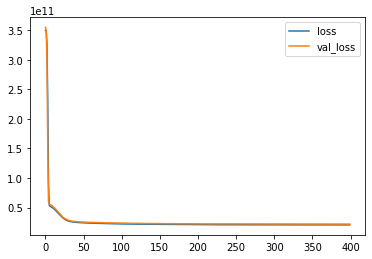

In [94]:
# Analizando la data sobre el progreso del error durante el entrenamiento:

losses = pd.DataFrame(model.history.history)
print(losses.head())
losses.plot() #graficando estos errores

In [95]:
# Realizando predicción:

predictions = model.predict(X_test)

# Analizando error cuadratico medio:

np.sqrt(mean_squared_error(y_test, predictions))

# Analizando error absoluto medio:

mean_absolute_error(y_test, predictions)

99773.93641918218

In [96]:
explained_variance_score(y_test, predictions)

0.7419458504041242

In [99]:
df2.describe()
print(5.189146e+05)

518914.6


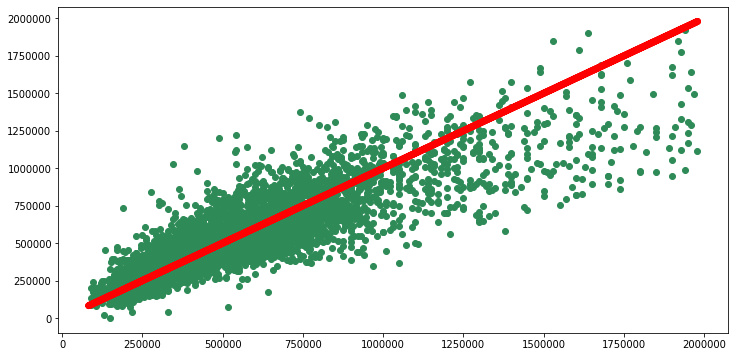

In [105]:
# Graficando diferencias entre lo predicho y lo real:

plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions, color="seagreen")
plt.plot(y_test, y_test, "r", linewidth="7") #para compararlo con la recta de correlacion perfecta